# Tutorial

### All imports

In [10]:
import os

import numpy as np
import scipy

import point_group as gpoints

import skimage.io as skio
import skimage.feature as skf
import skimage.transform as sktr
from matplotlib import pyplot as plt
from proximity_segmentation import calculate_energy

%matplotlib inline

### Constants

In [2]:
src_folder = "input"

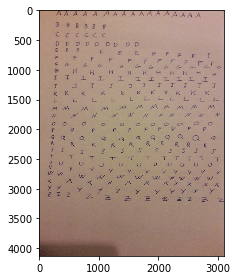

In [3]:
gray_image = skio.imread(os.path.join("input", "characters_sheet.jpg"), as_gray=True)
gray_image = sktr.rotate(gray_image, -90., resize=True)
skio.imshow(gray_image)
skio.show()
#plt.show()

In [4]:
#skio.call_plugin("imshow", "matplotlib")
skio.find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'freeimage': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave',
  'imshow',
  'imread',
  'imread_collection',
  'imshow_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}

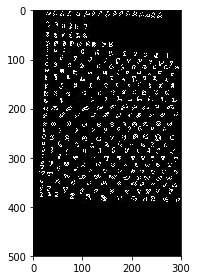

In [5]:
image_canny = skio.imread(os.path.join(src_folder, "canny.jpg"))
image_canny = sktr.rotate(image_canny, -90., resize=True)
skio.imshow(image_canny)
skio.show()

C:\Users\clement_besnier\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


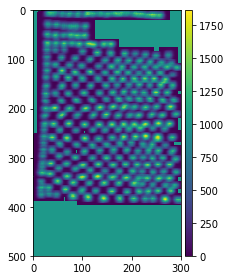

In [24]:
def calculate_energy(image):
    # size = 11
    energy = np.zeros(image.shape)
    size_max = 25
    for size in range(3, size_max, 4):
        kernel = np.zeros((size, size))
        kernel[int(size/2)-5:int(size/2)+5, :] = 1
        energy += (size_max-size)*scipy.ndimage.filters.convolve(image, kernel)
    energy = 1000*(energy == np.zeros(image.shape)) + energy
    return energy

energy = calculate_energy(image_canny)
skio.imshow(energy)
skio.show()